# Investigating the Causes of Exercise-Induced Angina

## Introduction
Heart disease is the leading cause of death for both men and women of all racial and ethnic backgrounds within the United States. About 20.5 million U.S. adults have coronary artery disease, which occurs when the vessels supplying blood to your heart narrow. Exercise-induced angina, a common preset symptom of coronary artery disease, is chest pain that occurs due to reduced blood flow to the heart when an individual exercises. 

While it is good to exercise regularly, this symptom needs to be taken into consideration when deciding the right fitness plan for the individual to avoid heart disease. For example, an individual more prone to angina due to movement should lower the intensity of their cardio to avoid an episode. Our project will be using data analysis to investigate what other factors may cause an individual to suffer exercise-induced angina, and to report our findings on this matter.

Therefore, this research will investigate the question: 
 **How do factors such as cholesterol level, maximum heart rate, and age impact the likelihood of an individual experiencing exercise-induced angina?**



## Preliminary Exploratory Data Analysis
### Loading in libraries and the data set

In [4]:
## Loading libraries:
library(tidyverse)
library(readr)
library(tidymodels)
library(stringr)
options(repr.matrix.max.rows = 6)

# Set seed to ensure reproducibility
set.seed(1)

## Hide message
show_col_types = FALSE

### Cleaning and wrangling data

In [5]:
## Clean and wrangle data 

## Loading data set with a url
file_url <- "http://raw.githubusercontent.com/kakeysword/dsci100-heart-disease/main/cleve.mod"

heart_disease_data <- read_delim(url(file_url), ",", skip = 19, col_names = FALSE)

## Assigning column names to the data set
heart_disease_clean <- heart_disease_data |> 
    separate(X1, into = c("age", "sex", "cp", "trestbps", "chol","fbs", 
                   "restecg", "thalach", "exang", "oldpeak", "slope", 
                   "ca", "thal", "num"), sep = "\\s+")

## Changing columns to the correct type
heart_disease_clean <- mutate_at(heart_disease_clean, 
                             c("age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num"),
                            as.numeric) |>
    mutate(exang = as_factor(exang)) |>
    select(exang, age, trestbps, chol, thalach)

## Replace all values of "fal" in exang column to "false" for better readablity
heart_disease_clean$exang <- str_replace(heart_disease_clean$exang, "fal", "false")

## Splitting the data into training and testing
heart_disease_split <- initial_split(heart_disease_clean, prop = 0.75, strata = exang)

heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train    


Rows: 303 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 14 pieces. Additional pieces discarded in 303 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = .Primitive("as.double")(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


exang,age,trestbps,chol,thalach
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
false,63,145,233,150
false,37,130,250,187
false,57,140,192,148
⋮,⋮,⋮,⋮,⋮
true,42,136,315,125
true,57,132,207,168
true,74,120,269,121


### Summarizing the data

In [7]:
## Data to see number of occurences of exercise-induced angina

num_cp <- heart_disease_train |>
    group_by(exang) |>
    summarize(count = n(),
             avg_age = mean(age),         ## age
             avg_chol = mean(chol),       ## serum cholesterol
             avg_thalach = mean(thalach)) ## max heart rate

num_cp

exang,count,avg_age,avg_chol,avg_thalach
<chr>,<int>,<dbl>,<dbl>,<dbl>
false,153,53.66013,242.1373,156.3203
true,74,55.72973,248.5135,136.6081


### Visualizing the data

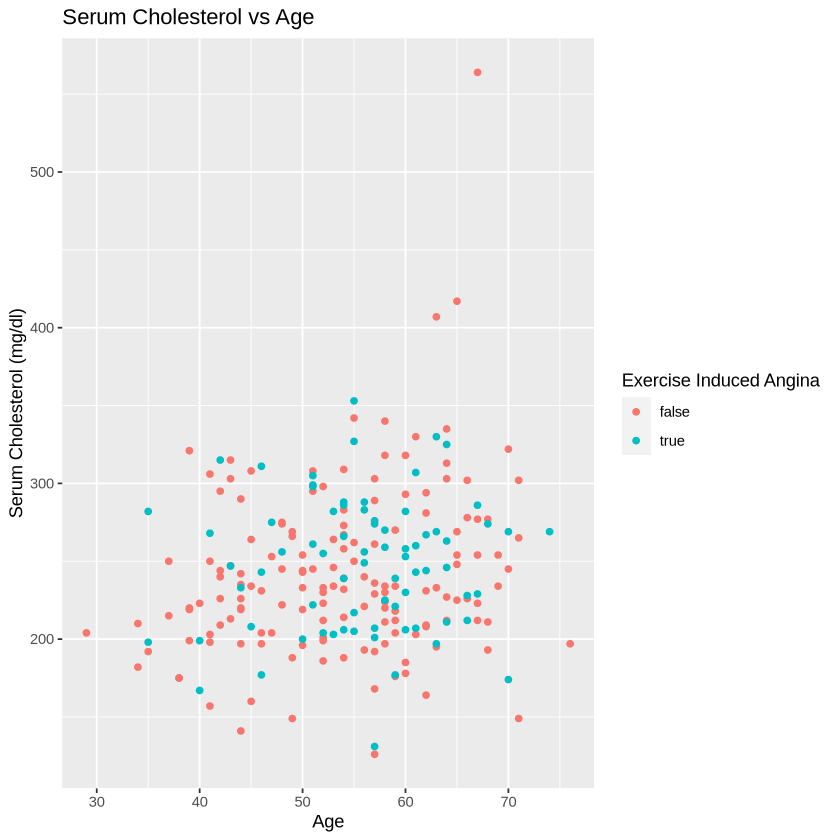

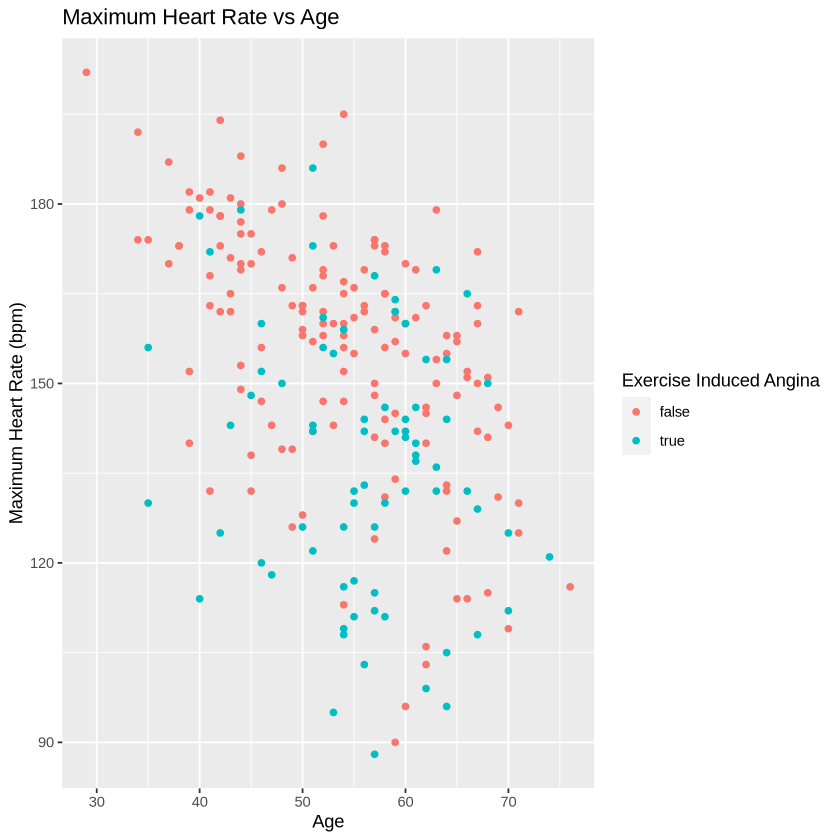

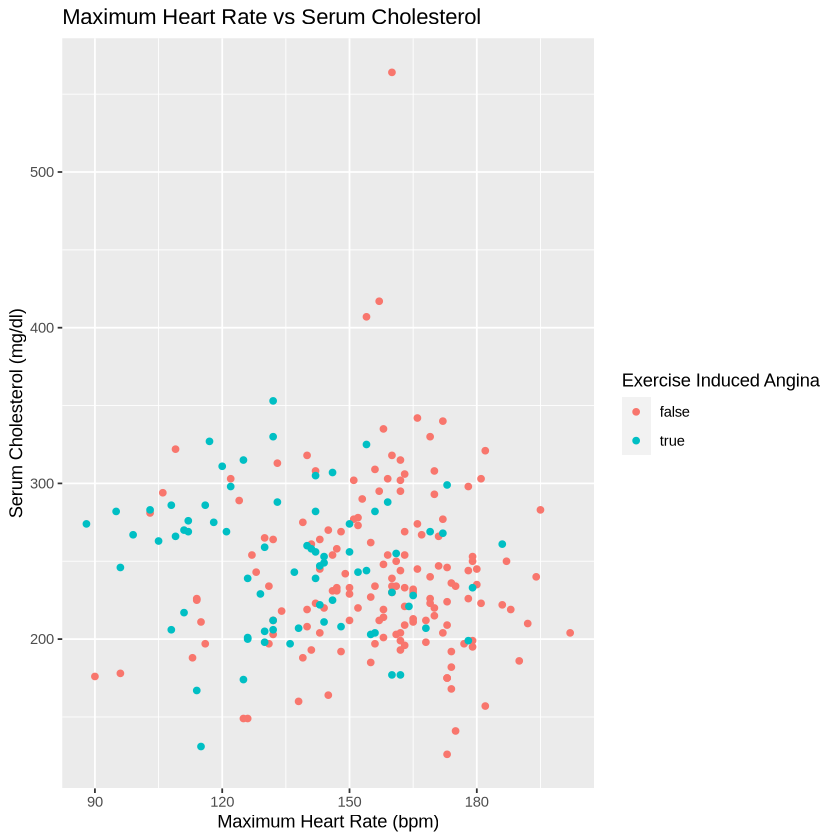

In [9]:
## Create plots to visualize data

## Serum Cholesterol vs Age
chol_age_plot <- heart_disease_train |>
    ggplot(aes(x = age, y = chol, color = exang)) +
    geom_point() +
    labs(x= "Age", y = "Serum Cholesterol (mg/dl)", 
         title = "Serum Cholesterol vs Age",
        color = "Exercise Induced Angina")
chol_age_plot

## Maximum Heart rate vs Age
thalach_age_plot <- heart_disease_train |>
    ggplot(aes(x = age, y = thalach, color = exang)) +
    geom_point() +
    labs(x= "Age", y = "Maximum Heart Rate (bpm)", 
         title = "Maximum Heart Rate vs Age",
        color = "Exercise Induced Angina")
thalach_age_plot

## Serum Cholesterol vs Maximum Heart rate
chol_thalach_plot <- heart_disease_train |>
    ggplot(aes(x = thalach, y = chol, color = exang)) +
    geom_point() +
    labs(x= "Maximum Heart Rate (bpm)", y = "Serum Cholesterol (mg/dl)", 
         title = "Maximum Heart Rate vs Serum Cholesterol",
        color = "Exercise Induced Angina")
chol_thalach_plot



## Methods
After loading in the necessary libraries, we loaded in the `cleve.mod` data set from the Heart Disease Database, which contains data taken from patients at the Cleveland Clinic in Cleveland Ohio.
Our data analysis will be performing a classification to determine whether a new patient is likely to experience exercise-induced angina.
We are using `exang` (exercised-induced angina) as our classification variable, and the following 3 columns as the predictors: `age, trestbps, chol, thalach`. <br><br>
`exang` : Exercise induced angina (true or false) <br>
`age` : Age in years <br>
`trestbps` : resting blood pressure (Hg) <br>
`chol` : serum cholesterol (mg/dl) <br>
`thalach` : maximum heart rate <br>
`exang` : Exercise induced angina (true or false) <br><br>
When cleaning the data,


## Expected Outcomes and Significance